## Домашняя работа №2
Работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.


### 1. Загрузка данных и первичный осмотр

In [1]:
# импортирование необходимых библиотек
import pandas as pd, matplotlib.pyplot as plt

In [2]:
# получение текущего путя к файлу с данными
#import os
#dataSetDirectory = os.getcwd()+"/S02-hw-dataset.csv"
dataSetDirectory = "S02-hw-dataset.csv"
# импортирование данных в pandas.DataFrame
df = pd.read_csv(dataSetDirectory)

In [3]:
# вывод первичной информации
print(df.head(),"\n########################")
print(df.info(),"\n########################")
print(df.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296 
########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None 
########################
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000 

### 2. Пропуски, дубликаты и базовый контроль качества

In [4]:
# посчитаем долю пропусков
print(df.isna().mean())

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [5]:
# проверяем наличие полностью дублирующих строк

print("Количество дублей: ",df.duplicated().sum())

Количество дублей:  1


In [6]:
# Поиск "подозрительных" значений 

#Вывод строк содержащих отрицательные значения
print("Строки с отрицательными значениями: \n",
      df[(df['age']<0) | (df['purchases']<0) | (df['revenue']<0)],"\n")
print("Странные значения возраста: \n",
      df[(df['age']<18) | (df['age']>99)],"\n")
print("Нулевая выручка при ненулевых продажах: \n",
      df[(df['revenue']==0) & (df['purchases']>0)],"\n")
print("Нулевые продажи при ненулевой выручке: \n",
      df[(df['purchases']==0) & (df['revenue']>0)],"\n")

Строки с отрицательными значениями: 
    user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785 

Странные значения возраста: 
     user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488 

Нулевая выручка при ненулевых продажах: 
     user_id   age country  purchases  revenue
10       11  24.0      US          4        0 

Нулевые продажи при ненулевой выручке: 
 Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: [] 



#### Вывод
В дата сете было обнаружено несколько проблем:
1) Отсутствие значения age в 5% строк
2) Наличие дубликата строки
3) Присутсвие аномальных знаечний в некоторых строках:
   * Отрицательного значения продаж
   *  Подозрительных значений возраста (5 и 120 лет)
   *  Нулевой выручки при ненулевых продажах

### 3. Базовый EDA: группировки, агрегаты и частоты

In [7]:
# Нахождения числа вхождений по странам
print(df["country"].value_counts(),"\n")

# Группировка по странам
print(df.iloc[:,1:-1].groupby("country").agg(['mean','sum']),"\n")

# Группировка по возрастным категориям
df['age_bin'] = pd.cut(df['age'], bins=[18,25,45,65,99])
print(df[['purchases','revenue','age_bin']].groupby("age_bin",observed=True).agg(['mean','sum','count']))

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64 

               age        purchases    
              mean    sum      mean sum
country                                
CN       24.000000   48.0  4.500000   9
DE       34.600000  173.0  6.500000  39
FR       46.250000  555.0  4.250000  51
RU       30.076923  391.0  4.769231  62
US       36.714286  257.0  4.625000  37 

         purchases                revenue             
              mean sum count         mean    sum count
age_bin                                               
(18, 25]  5.000000  50    10   581.600000   5816    10
(25, 45]  4.882353  83    17  1003.000000  17051    17
(45, 65]  4.333333  39     9   605.777778   5452     9


#### Вывод
В датасете можно сделать следующие наблюдения:

1) По странам:
   * Больше всего продавцов ис России и Франции
   * Средний возраст продавца больше вссего во Франции
   * Средняя ввыручка и среднее количество продаж больше всего в Германии
   * Больше всего сумма выручки и продаж в России
2) По возрастам:
   * Средняя выручка заметно больше в возрастной группе 25-45 лет
   * Среднее количество продаж среди групп примерно одинаково

### 4. Визуализация данных в Matplotlib

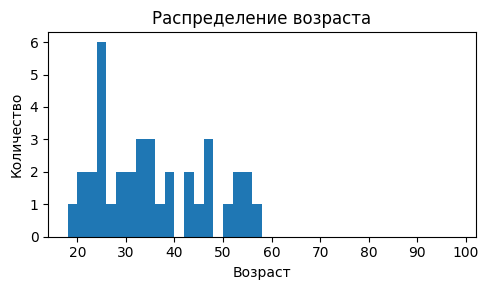

In [8]:
# Гистограмма возрастов

fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(df['age'],bins=range(18,99,2))
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество')
ax.set_title('Распределение возраста')
plt.tight_layout()
plt.savefig("figures/AgeHistogram.png")
plt.show()


**Вывод по графику:**  
Возраст распределен в диапозоне от 18 до 58 лет (если убрать "выбросы") 
Больше всего людей в возрасте от 24 до 26 лет

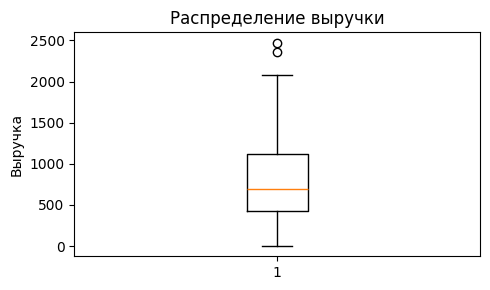

In [9]:
# Ящик с усами

fig, ax = plt.subplots(figsize=(5, 3))

ax.boxplot(df['revenue'])
ax.set_ylabel('Выручка')
ax.set_title('Распределение выручки')
plt.tight_layout()
plt.show()

**Вывод по графику:**  
Средняя выручка ~700  
Есть два выброса, которые почти доходят до 2500

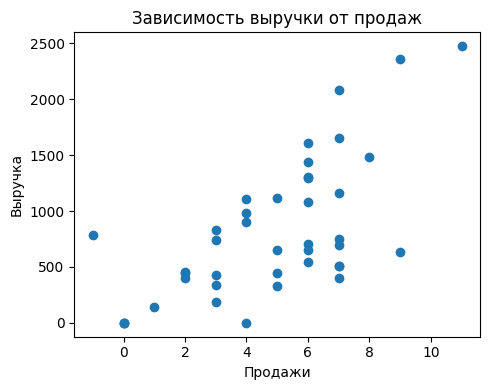

In [10]:
# Диаграмм рассеивания

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(df['purchases'],df['revenue'])
ax.set_xlabel("Продажи")
ax.set_ylabel("Выручка")
ax.set_title("Зависимость выручки от продаж")

plt.tight_layout()
plt.show()

**Вывод по графику:**  
График отдаленно напоминает линейную зависимость, что логично: с ростом продаж растет и выручка.  
Но на графике видный выбросы, что показывает, что выручка может расти не так быстро с тростом товаров в зависимости от цены товаров